# Data analytics on trade data
### In this analysis we are going to describe the behaviour of muliple trading plans.


In [3]:
# IMPORT PANDAS
import pandas as pd

# IMPORT NUMPY
import numpy as np

# IMPORT NATPLOTLIB
import matplotlib.pyplot as plt

# IMPORT SEABORN
import seaborn as sns

### LOAD THE DATA SET

In [4]:
df_trade_data = pd.read_csv("trade_data.csv")

### Data Overview

In [5]:
# Show first five observations of the data
df_trade_data.head()

HSCode    type                                          Commodity  value  \
0       2  Export                        MEAT AND EDIBLE MEAT OFFAL.   0.18   
1       3  Export  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...   0.00   
2       4  Export  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...  12.48   
3       6  Export  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...   0.00   
4       7  Export    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   1.89   

           country  year  trade_value  quantity  unit_price  shipping_cost  \
0  AFGHANISTAN TIS  2018     38079.47         3    12693.16        9054.39   
1  AFGHANISTAN TIS  2018     95120.72       461      206.34         154.89   
2  AFGHANISTAN TIS  2018     73467.40         5    14693.48        5948.07   
3  AFGHANISTAN TIS  2018     60267.19        14     4304.80        7335.05   
4  AFGHANISTAN TIS  2018     16445.85       482       34.12        9840.70   

       tax     duty  
0  4683.36  1362.03  
1  5287.75  8875.51  
2  4867.17  6827.14  
3  8964.37  4369.10  
4  1248.63  1616.67

In [6]:
# Show last five observations of the data
df_trade_data.tail()

HSCode    type                                          Commodity  \
213142      81  Import      OTHER BASE METALS; CERMETS; ARTICLES THEREOF.   
213143      82  Import  TOOLS IMPLEMENTS, CUTLERY, SPOONS AND FORKS, O...   
213144      84  Import  NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHA...   
213145      85  Import  ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS T...   
213146      99  Import                               MISCELLANEOUS GOODS.   

        value   country  year  trade_value  quantity  unit_price  \
213142   0.14  ZIMBABWE  2010     51205.04       156      328.24   
213143   0.00  ZIMBABWE  2010     40865.13       146      279.90   
213144    NaN  ZIMBABWE  2010     41407.16       158      262.07   
213145    NaN  ZIMBABWE  2010     14402.78       237       60.77   
213146    NaN  ZIMBABWE  2010     17311.08       190       91.11   

        shipping_cost      tax     duty  
213142        3759.79  6629.44  2116.54  
213143        2184.47  3806.54  3855.32  
213144        8656.33  2888.38  2207.66  
213145        3690.04  1113.21   949.63  
213146        7952.22  2227.91  1240.55

In [7]:
# Show the shape of the data
# shape is a keyword not a function
df_trade_data.shape

(213147, 12)

**Interpretation**
 - We have 213147 observations (Rows)
 - We have 12 attributes (Columns)

In [8]:
# Show the basic info of the data
df_trade_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213147 entries, 0 to 213146
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   HSCode         213147 non-null  int64  
 1   type           213147 non-null  object 
 2   Commodity      213147 non-null  object 
 3   value          187521 non-null  float64
 4   country        213147 non-null  object 
 5   year           213147 non-null  int64  
 6   trade_value    213147 non-null  float64
 7   quantity       213147 non-null  int64  
 8   unit_price     213147 non-null  float64
 9   shipping_cost  213147 non-null  float64
 10  tax            213147 non-null  float64
 11  duty           213147 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 19.5+ MB


In [9]:
# Justify the basic statistics of the data
# T means transpose
df_trade_data.describe().T

count          mean           std      min       25%  \
HSCode         213147.0     52.249846     27.877911     1.00     29.00   
value          187521.0     35.607086    433.335357     0.00      0.03   
year           213147.0   2014.042731      2.579942  2010.00   2012.00   
trade_value    213147.0  50512.592717  28569.510216  1000.47  25717.83   
quantity       213147.0    250.676026    144.290385     1.00    126.00   
unit_price     213147.0    689.124882   3304.454811     2.06    102.56   
shipping_cost  213147.0   5053.132325   2854.710119   100.01   2582.06   
tax            213147.0   5050.602347   3309.581993    52.03   2347.84   
duty           213147.0   3033.304680   2177.299272    20.96   1282.46   

                    50%        75%       max  
HSCode            53.00     75.000     99.00  
value              0.36      4.050  32781.57  
year            2014.00   2016.000   2018.00  
trade_value    50589.92  75226.030  99999.21  
quantity         251.00    376.000    500.00  
unit_price       201.69    400.820  99614.99  
shipping_cost   5059.64   7521.095   9999.98  
tax             4599.52   7257.645  14957.67  
duty            2555.43   4413.585   9986.18

In [10]:
## Data Pre-Processing

In [11]:
# Null value handling
# Show the count of null records in the data
df_trade_data.isnull()

HSCode   type  Commodity  value  country   year  trade_value  \
0        False  False      False  False    False  False        False   
1        False  False      False  False    False  False        False   
2        False  False      False  False    False  False        False   
3        False  False      False  False    False  False        False   
4        False  False      False  False    False  False        False   
...        ...    ...        ...    ...      ...    ...          ...   
213142   False  False      False  False    False  False        False   
213143   False  False      False  False    False  False        False   
213144   False  False      False   True    False  False        False   
213145   False  False      False   True    False  False        False   
213146   False  False      False   True    False  False        False   

        quantity  unit_price  shipping_cost    tax   duty  
0          False       False          False  False  False  
1          False       False          False  False  False  
2          False       False          False  False  False  
3          False       False          False  False  False  
4          False       False          False  False  False  
...          ...         ...            ...    ...    ...  
213142     False       False          False  False  False  
213143     False       False          False  False  False  
213144     False       False          False  False  False  
213145     False       False          False  False  False  
213146     False       False          False  False  False  

[213147 rows x 12 columns]

In [12]:
df_trade_data.isnull().sum()

HSCode               0
type                 0
Commodity            0
value            25626
country              0
year                 0
trade_value          0
quantity             0
unit_price           0
shipping_cost        0
tax                  0
duty                 0
dtype: int64

**Interpretation**
 - We have 8 null records in Education attribute.

In [13]:
# Find the percentage of missing records
df_trade_data.isnull().sum() / len(df_trade_data) * 100

HSCode            0.000000
type              0.000000
Commodity         0.000000
value            12.022689
country           0.000000
year              0.000000
trade_value       0.000000
quantity          0.000000
unit_price        0.000000
shipping_cost     0.000000
tax               0.000000
duty              0.000000
dtype: float64

In [14]:
# Drop the null records from the dataframe
df_trade_data.dropna(inplace=True)

In [15]:
# Do the authentic check
df_trade_data.isnull().sum()

HSCode           0
type             0
Commodity        0
value            0
country          0
year             0
trade_value      0
quantity         0
unit_price       0
shipping_cost    0
tax              0
duty             0
dtype: int64

### Data pre-processing is done

# EDA - Exploratory data analytics

# Univariate Analysis

In [16]:
# segrigate the data based on datatype
df_num = df_trade_data.select_dtypes(include="number")  # numerical data frame
df_cat = df_trade_data.select_dtypes(include="object")  # categarical data fram

### Numerical columns Analysis

In [17]:
# show the numerical column
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### HSCode

In [18]:
# Show the minimum age
df_num.HSCode.min()

np.int64(1)

In [19]:
# Show the maximum age
df_num.HSCode.max()

np.int64(99)

In [20]:
# Show the average
df_num.HSCode.mean()

np.float64(52.10141797452019)

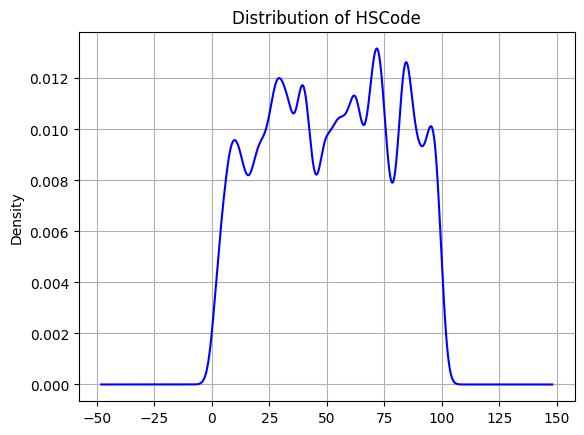

In [21]:
# Show the distribution of the single numerical column
df_num.HSCode.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of HSCode")
plt.show()

**Interpretation**
 - Minimum HSCode of the person in the data is 1.
 - Maximum HSCode of the person in the data is 99.
 - Average HSCode of the person in the data is 52.24.
 - The data follows multimodel distribution.

In [22]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### Value

In [23]:
# Show the minimum age
df_num.value.min()

np.float64(0.0)

In [24]:
# Show the maximum age
df_num.value.max()

np.float64(32781.57)

In [25]:
# Show the average
df_num.value.mean()

np.float64(35.60708608635832)

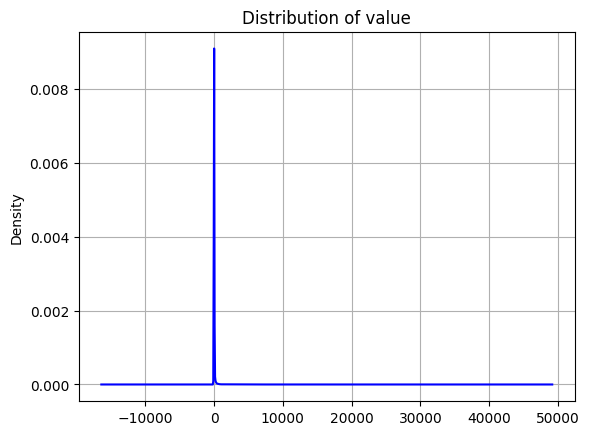

In [26]:
# Show the distribution of the single numerical column
df_num.value.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of value")
plt.show()

**Interpretation**
 - Minimum value in the data is 0.
 - Maximum value in the data is 32781.57.
 - Average value in the data is 35.607.

In [27]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### trade_value

In [28]:
# Show the minimum age
df_num.trade_value.min()

np.float64(1000.47)

In [29]:
# Show the minimum age
df_num.trade_value.max()

np.float64(99999.21)

In [30]:
# Show the minimum age
df_num.trade_value.mean()

np.float64(50497.53675583002)

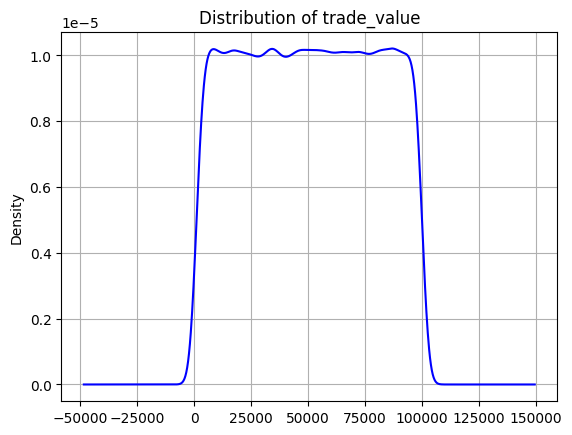

In [31]:
# Show the distribution of the single numerical column
df_num.trade_value.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of trade_value")
plt.show()

**Interpretation**
 - Minimum trade_value in the data is 1000.27.
 - Maximum trade_value in the data is 99999.21.
 - Average trade_value in the data is 50512.59271685737`.
 - The data follows multimodel distribution.

In [32]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### quantity

In [33]:
# Show the minimum age
df_num.quantity.min()

np.int64(1)

In [34]:
# Show the minimum age
df_num.quantity.max()

np.int64(500)

In [35]:
# Show the minimum age
df_num.quantity.mean()

np.float64(250.6667893195962)

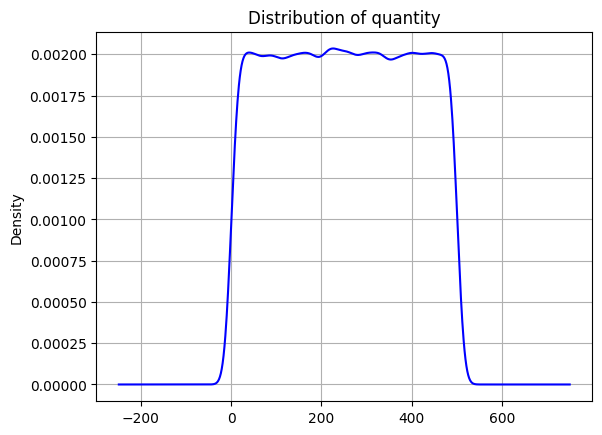

In [36]:
# Show the distribution of the single numerical column
df_num.quantity.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of quantity")
plt.show()

**Interpretation**
 - Minimum quantity in the data is 1.
 - Maximum quantity in the data is 500.
 - Average quantity in the data is 250.67602640431252.
 - The data follows multimodel distribution.

In [37]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### unit_price

In [38]:
# Show the minimum age
df_num.unit_price.min()

np.float64(2.06)

In [39]:
# Show the minimum age
df_num.unit_price.max()

np.float64(99614.99)

In [40]:
# Show the minimum age
df_num.unit_price.mean()

np.float64(687.6116648802)

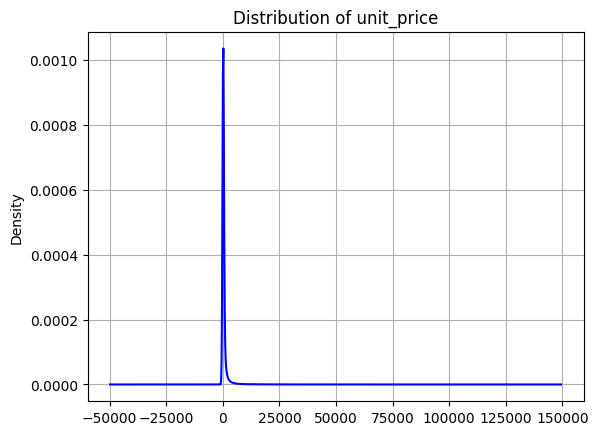

In [41]:
# Show the distribution of the single numerical column
df_num.unit_price.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of unit_price")
plt.show()

**Interpretation**

 - Minimum unit_price in the data is 2.
 - Maximum unit_price in the data is 99614.
 - Average unit_price in the data is 689.1248821236047.

In [42]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### shipping_cost

In [43]:
# Show the minimum age
df_num.shipping_cost.min()

np.float64(100.01)

In [44]:
# Show the minimum age
df_num.shipping_cost.max()

np.float64(9999.98)

In [45]:
# Show the minimum age
df_num.shipping_cost.mean()

np.float64(5053.413814666091)

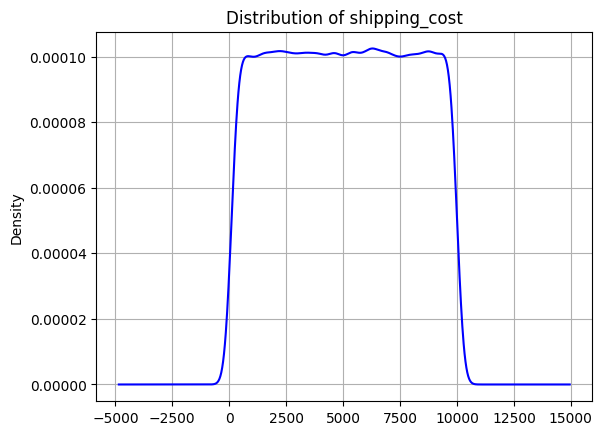

In [46]:
# Show the distribution of the single numerical column
df_num.shipping_cost.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of shipping_cost")
plt.show()

**Interpretation**

 - Minimum shipping_cost in the data is 100.01.
 - Maximum shipping_cost in the data is 9999.98.
 - Average shipping_cost in the data is 5053.132324639802.
 - The data follows multimodel distribution.

In [47]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### tax

In [48]:
# Show the minimum age
df_num.tax.min()

np.float64(52.03)

In [49]:
# Show the minimum age
df_num.tax.max()

np.float64(14957.67)

In [50]:
# Show the minimum age
df_num.tax.mean()

np.float64(5047.068555308472)

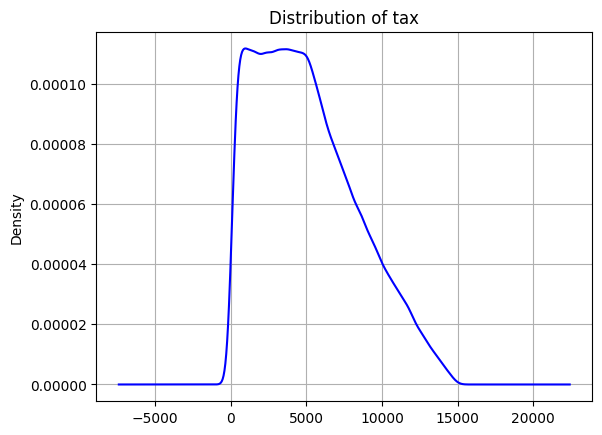

In [51]:
# Show the distribution of the single numerical column
df_num.tax.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of tax")
plt.show()

**Interpretation**

 - Minimum tax in the data is 52.03.
 - Maximum tax in the data is 14957.67.
 - Average tax in the data is 5050.602346549565.
 - The data follows multimodel distribution.

In [52]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

#### duty

In [53]:
# Show the minimum age
df_num.duty.min()

np.float64(20.96)

In [54]:
# Show the minimum age
df_num.duty.max()

np.float64(9986.18)

In [55]:
# Show the minimum age
df_num.duty.mean()

np.float64(3031.500477546515)

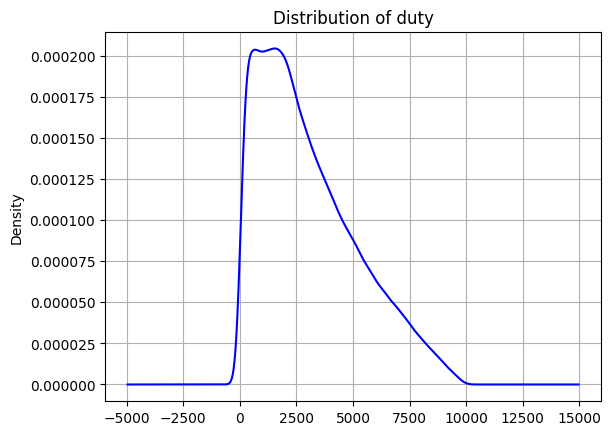

In [56]:
# Show the distribution of the single numerical column
df_num.duty.plot(kind="kde", color="blue")  # Kernal Density Plot
plt.grid()
plt.title("Distribution of duty")
plt.show()

**Interpretation**

 - Minimum duty in the data is 20.96.
 - Maximum duty in the data is 9986.18.
 - Average duty in the data is 3033.3046796342433.
 - The data follows multimodel distribution.

### Categorical columns Analysis

In [57]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

#### type

In [58]:
# Find the count
df_cat.type.value_counts()

type
Export    122985
Import     64536
Name: count, dtype: int64

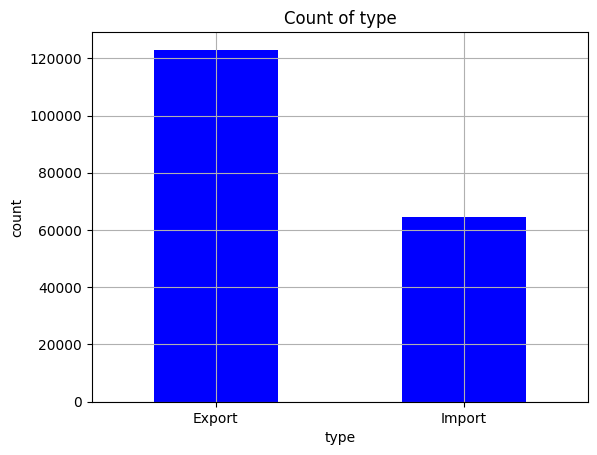

In [59]:
# Show the plot
df_cat.type.value_counts().plot(kind="bar", color="blue")
plt.grid()
plt.title("Count of type")
plt.xticks(rotation=0)
plt.ylabel("count")
plt.show()

**Interpretation**
 - We have count of supply exported is  137023.
 - We have count of supply imported is   76124.

In [60]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

#### Commodity

In [61]:
# Find the count
df_cat.Commodity.value_counts()

Commodity
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.    3454
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.                                                                            3386
PLASTIC AND ARTICLES THEREOF.                                                                                                                             3104
OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;               3052
IRON AND STEEL                                                                                                                                            2960
                                                                                                                                                          ... 
MEAT AND EDIBLE MEAT OFFAL.         

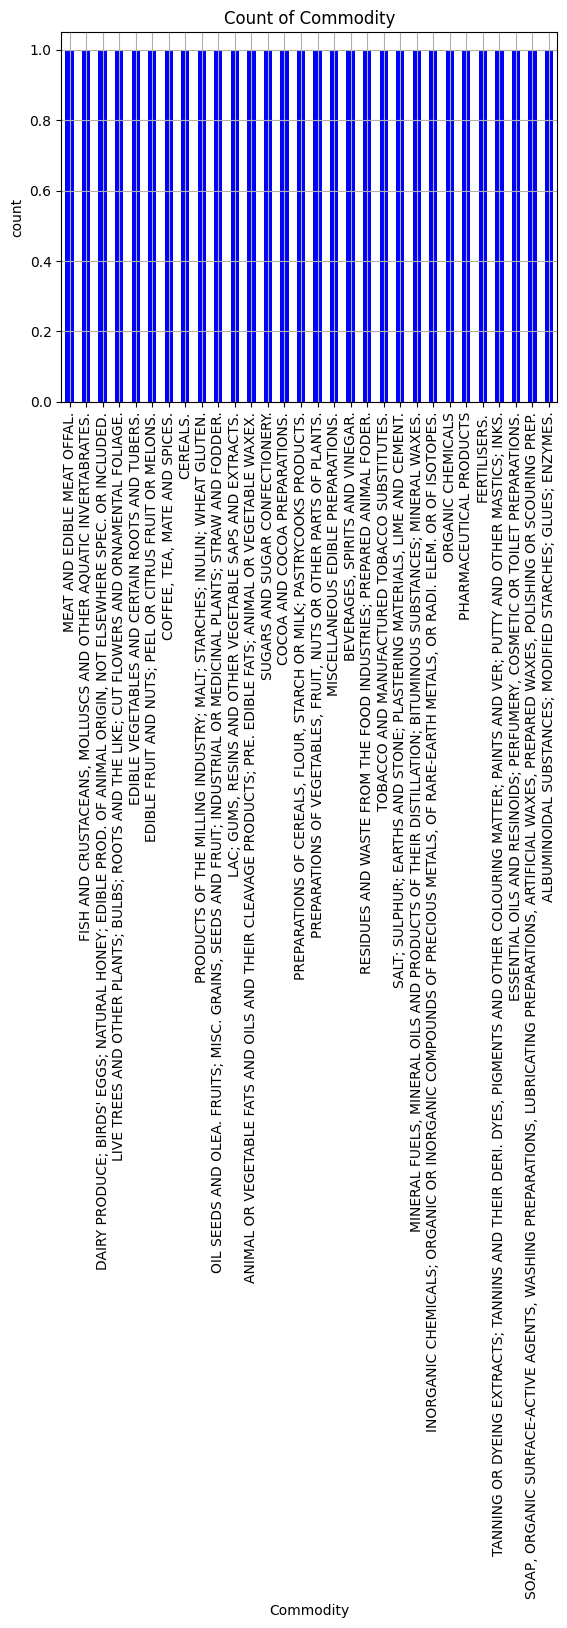

In [62]:
# Show the plot
df_cat.Commodity.head(30).value_counts().plot(kind="bar", color="blue")
plt.grid()
plt.title("Count of Commodity")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

**Interpretation**
 - We have the count of ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS is 3741.
 - We have the count of NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF is 3656
 - We have the count of PLASTIC AND ARTICLES THEREOF is 3397
 - We have the count of MISCELLANEOUS GOODS is 3389
 - We have the count of OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF is 3335
 - We have the count of TIN AND ARTICLES THEREOF is 969
 - We have the count of LIVE ANIMALS is 948
 - We have the count of MEAT AND EDIBLE MEAT OFFAL is 901
 - We have the count of FURSKINS AND ARTIFICIAL FUR, MANUFACTURES THEREOF is 900
 - We have the count of CORK AND ARTICLES OF CORK is 896


In [63]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

#### country

In [64]:
# Find the count
df_cat.country.value_counts()

country
U S A                                       1750
AUSTRALIA                                   1748
BELGIUM                                     1745
GERMANY                                     1736
U K                                         1734
                                            ... 
CHANNEL IS                                     4
INSTALLATIONS IN INTERNATIONAL WATERS          3
SINT MAARTEN (DUTCH PART)                      2
CURACAO                                        2
JERSEY                                         2
Name: count, Length: 248, dtype: int64

In [65]:
# Show the plot
x = df_trade_data["country"].unique()
print(x)

['AFGHANISTAN TIS' 'ALBANIA' 'ALGERIA' 'AMERI SAMOA' 'ANDORRA' 'ANGOLA'
 'ANGUILLA' 'ANTARTICA' 'ANTIGUA' 'ARGENTINA' 'ARMENIA' 'ARUBA'
 'AUSTRALIA' 'AUSTRIA' 'AZERBAIJAN' 'BAHAMAS' 'BAHARAIN IS'
 'BANGLADESH PR' 'BARBADOS' 'BELARUS' 'BELGIUM' 'BELIZE' 'BENIN' 'BERMUDA'
 'BHUTAN' 'BOLIVIA' 'BOSNIA-HRZGOVIN' 'BOTSWANA' 'BR VIRGN IS' 'BRAZIL'
 'BRUNEI' 'BULGARIA' 'BURKINA FASO' 'BURUNDI' 'C AFRI REP' 'CAMBODIA'
 'CAMEROON' 'CANADA' 'CAPE VERDE IS' 'CAYMAN IS' 'CHAD' 'CHILE'
 'CHINA P RP' 'COLOMBIA' 'COMOROS' 'CONGO D. REP.' 'CONGO P REP' 'COOK IS'
 'COSTA RICA' "COTE D' IVOIRE" 'CROATIA' 'CUBA' 'CYPRUS' 'CZECH REPUBLIC'
 'DENMARK' 'DJIBOUTI' 'DOMINIC REP' 'DOMINICA' 'ECUADOR' 'EGYPT A RP'
 'EL SALVADOR' 'EQUTL GUINEA' 'ERITREA' 'ESTONIA' 'ETHIOPIA' 'FALKLAND IS'
 'FAROE IS.' 'FIJI IS' 'FINLAND' 'FR GUIANA' 'FR POLYNESIA' 'FRANCE'
 'GABON' 'GAMBIA' 'GEORGIA' 'GERMANY' 'GHANA' 'GIBRALTAR' 'GREECE'
 'GREENLAND' 'GRENADA' 'GUADELOUPE' 'GUAM' 'GUATEMALA' 'GUINEA'
 'GUINEA BISSAU' 'GUYANA' 'HA

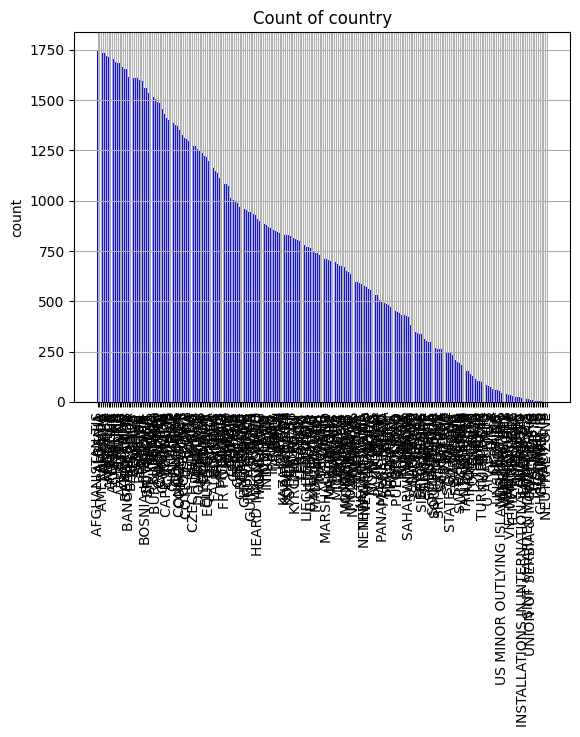

In [66]:
y = df_cat.country.value_counts()
plt.bar(x, y, color="blue")
plt.grid()
plt.title("Count of country")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

In [67]:
df_trade_data.columns

Index(['HSCode', 'type', 'Commodity', 'value', 'country', 'year',
       'trade_value', 'quantity', 'unit_price', 'shipping_cost', 'tax',
       'duty'],
      dtype='object')

### Bivariate Analysis

In [68]:
df_trade_data.head()

HSCode    type                                          Commodity  value  \
0       2  Export                        MEAT AND EDIBLE MEAT OFFAL.   0.18   
1       3  Export  FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...   0.00   
2       4  Export  DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...  12.48   
3       6  Export  LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...   0.00   
4       7  Export    EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.   1.89   

           country  year  trade_value  quantity  unit_price  shipping_cost  \
0  AFGHANISTAN TIS  2018     38079.47         3    12693.16        9054.39   
1  AFGHANISTAN TIS  2018     95120.72       461      206.34         154.89   
2  AFGHANISTAN TIS  2018     73467.40         5    14693.48        5948.07   
3  AFGHANISTAN TIS  2018     60267.19        14     4304.80        7335.05   
4  AFGHANISTAN TIS  2018     16445.85       482       34.12        9840.70   

       tax     duty  
0  4683.36  1362.03  
1  5287.75  8875.51  
2  4867.17  6827.14  
3  8964.37  4369.10  
4  1248.63  1616.67

In [70]:
df_num.corr()

HSCode     value      year  trade_value  quantity  \
HSCode         1.000000 -0.000539 -0.009309    -0.003255  0.001820   
value         -0.000539  1.000000  0.000617    -0.000677  0.000102   
year          -0.009309  0.000617  1.000000     0.003755 -0.001884   
trade_value   -0.003255 -0.000677  0.003755     1.000000  0.001889   
quantity       0.001820  0.000102 -0.001884     0.001889  1.000000   
unit_price    -0.001532 -0.002247  0.000619     0.120159 -0.256346   
shipping_cost  0.003450  0.001391 -0.000528    -0.001183  0.004034   
tax           -0.002351  0.000832  0.003165     0.862962 -0.000622   
duty          -0.002813 -0.000342  0.003640     0.787872  0.002680   

               unit_price  shipping_cost       tax      duty  
HSCode          -0.001532       0.003450 -0.002351 -0.002813  
value           -0.002247       0.001391  0.000832 -0.000342  
year             0.000619      -0.000528  0.003165  0.003640  
trade_value      0.120159      -0.001183  0.862962  0.787872  
quantity        -0.256346       0.004034 -0.000622  0.002680  
unit_price       1.000000      -0.002442  0.103378  0.094699  
shipping_cost   -0.002442       1.000000 -0.002009 -0.000384  
tax              0.103378      -0.002009  1.000000  0.680160  
duty             0.094699      -0.000384  0.680160  1.000000

<Axes: xlabel='tax', ylabel='trade_value'>

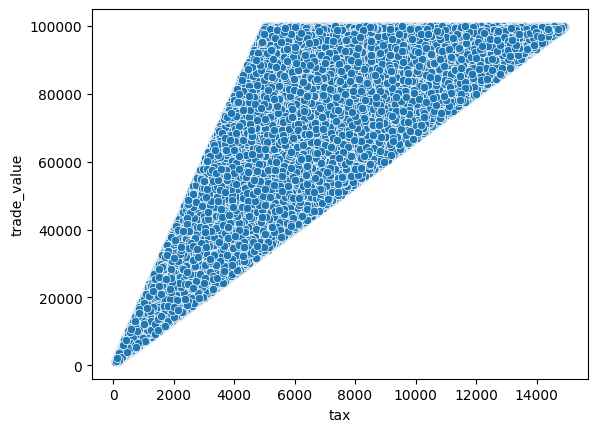

In [72]:
sns.scatterplot(x="tax", y="trade_value", data=df_trade_data)

<Axes: xlabel='duty', ylabel='trade_value'>

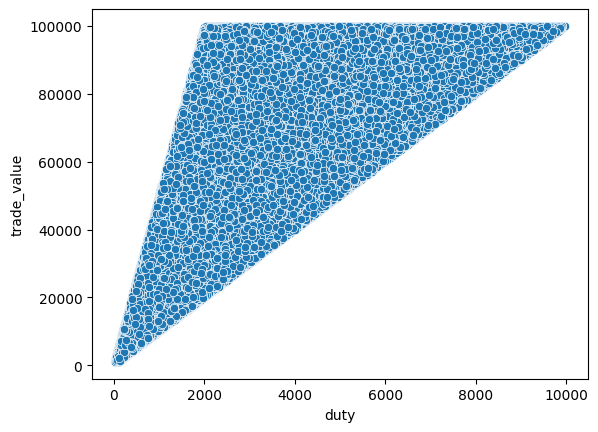

In [75]:
sns.scatterplot(x="duty", y="trade_value", data=df_trade_data)

<Axes: xlabel='tax', ylabel='duty'>

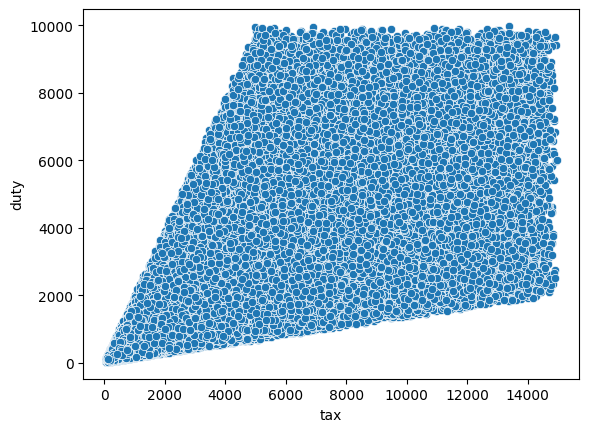

In [76]:
sns.scatterplot(x="tax", y="duty", data=df_trade_data)

## Bivariate Analysis on one numerical and one categorical column

In [77]:
# Show all categorical columns
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

In [78]:
# show the numerical columns
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

### type, HSCode

<Axes: xlabel='type', ylabel='HSCode'>

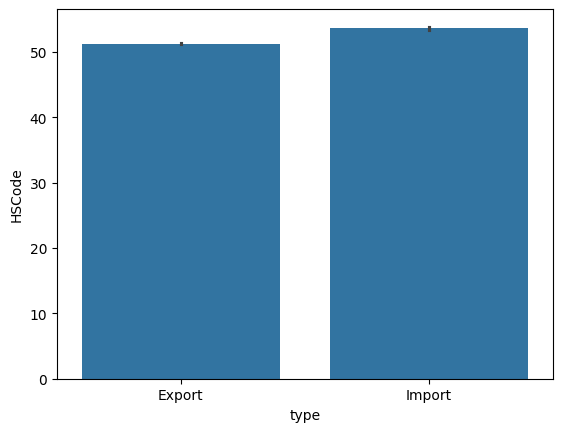

In [79]:
sns.barplot(df_trade_data, x="type", y="HSCode")

In [82]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

In [84]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

### Commodity, HSCode

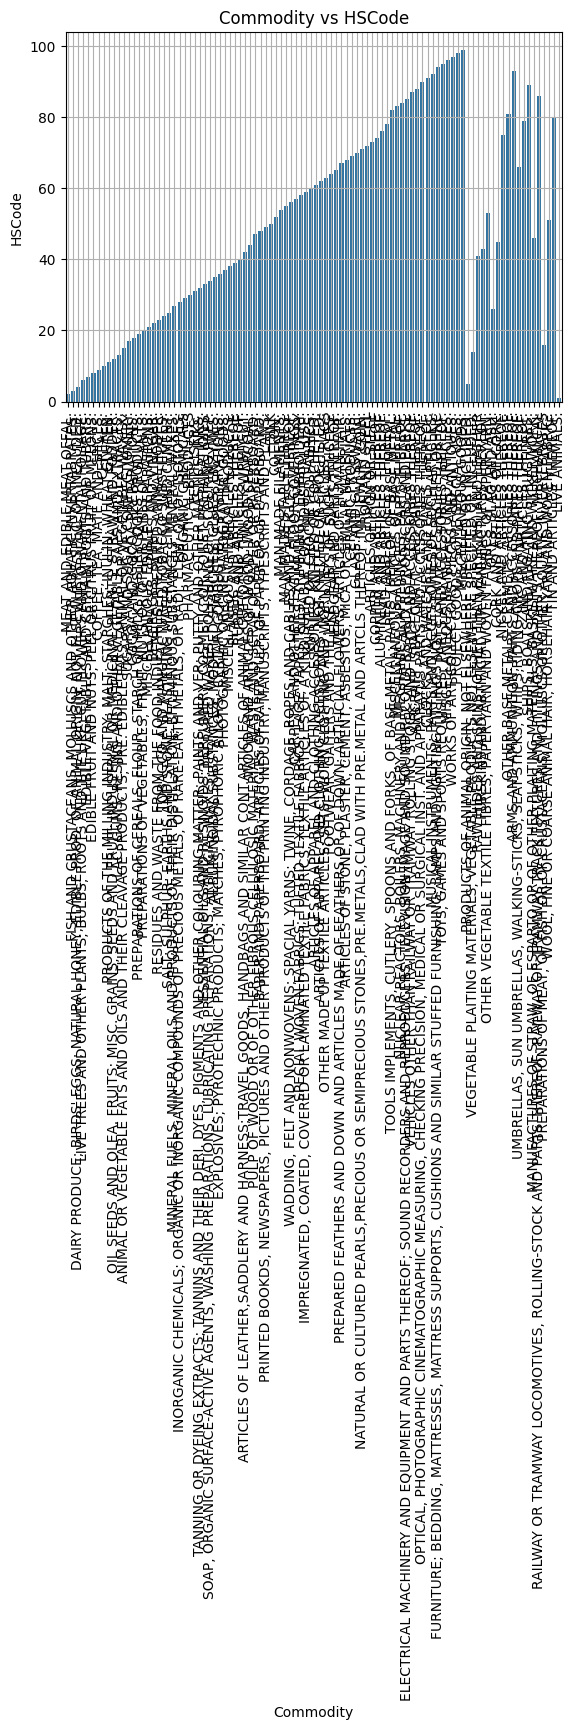

In [89]:
sns.barplot(df_trade_data, x="Commodity", y="HSCode")
plt.title("Commodity vs HSCode")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [90]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

In [91]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

### country, HSCode

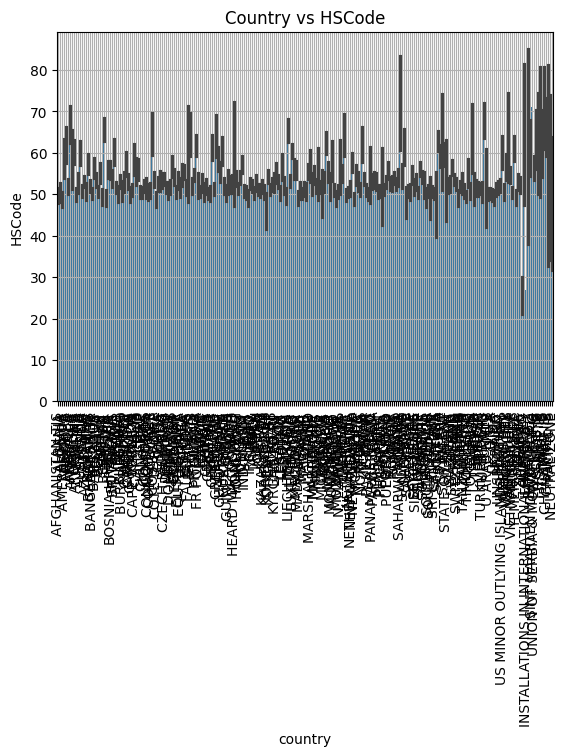

In [92]:
sns.barplot(df_trade_data, x="country", y="HSCode")
plt.title("Country vs HSCode")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [93]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

In [94]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

### type, value

<Axes: xlabel='type', ylabel='value'>

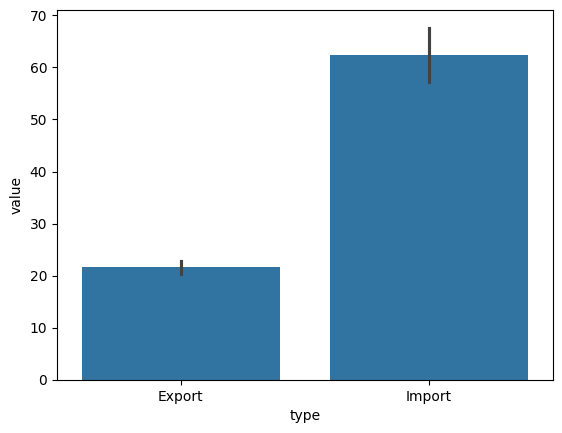

In [95]:
sns.barplot(df_trade_data, x="type", y="value")

In [96]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

In [97]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

### Commodity, value

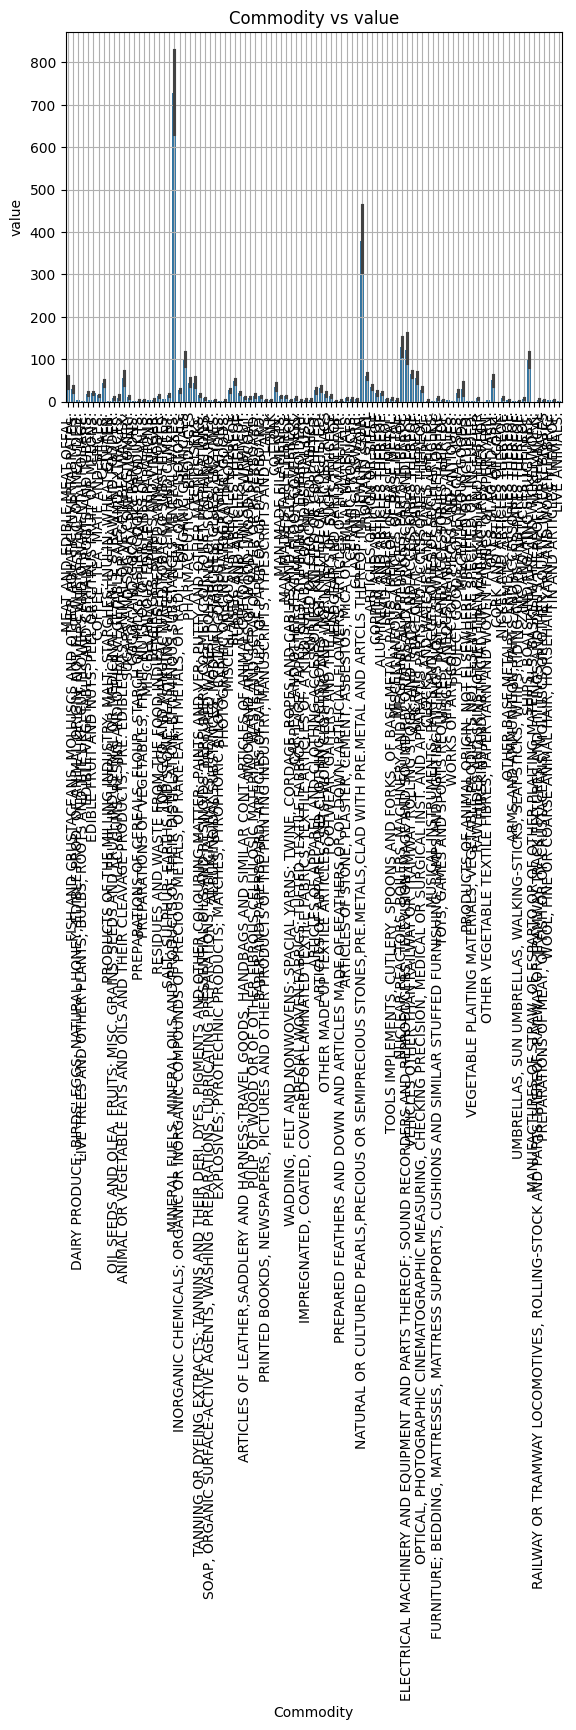

In [99]:
sns.barplot(df_trade_data, x="Commodity", y="value")
plt.title("Commodity vs value")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [100]:
df_cat.columns

Index(['type', 'Commodity', 'country'], dtype='object')

In [101]:
df_num.columns

Index(['HSCode', 'value', 'year', 'trade_value', 'quantity', 'unit_price',
       'shipping_cost', 'tax', 'duty'],
      dtype='object')

### country, value

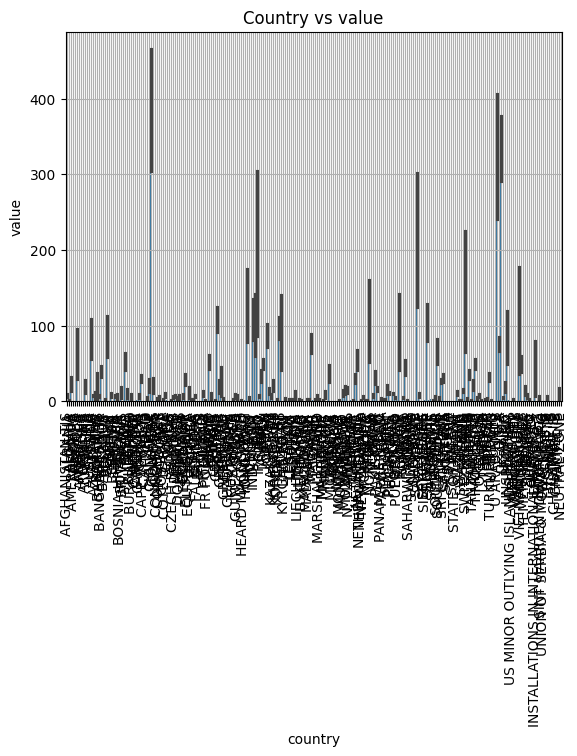

In [102]:
sns.barplot(df_trade_data, x="country", y="value")
plt.title("Country vs value")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### type, year

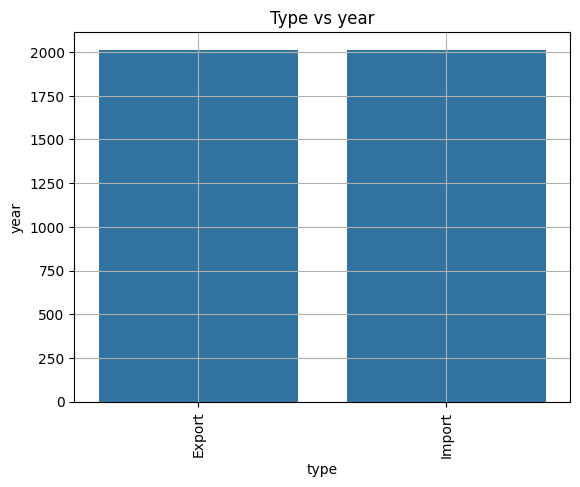

In [103]:
sns.barplot(df_trade_data, x="type", y="year")
plt.title("Type vs year")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### type, trade_value

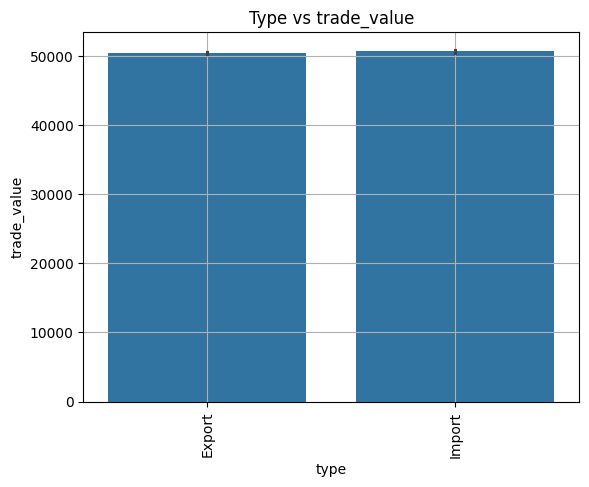

In [106]:
sns.barplot(df_trade_data, x="type", y="trade_value")
plt.title("Type vs trade_value")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Commodity, trade_value

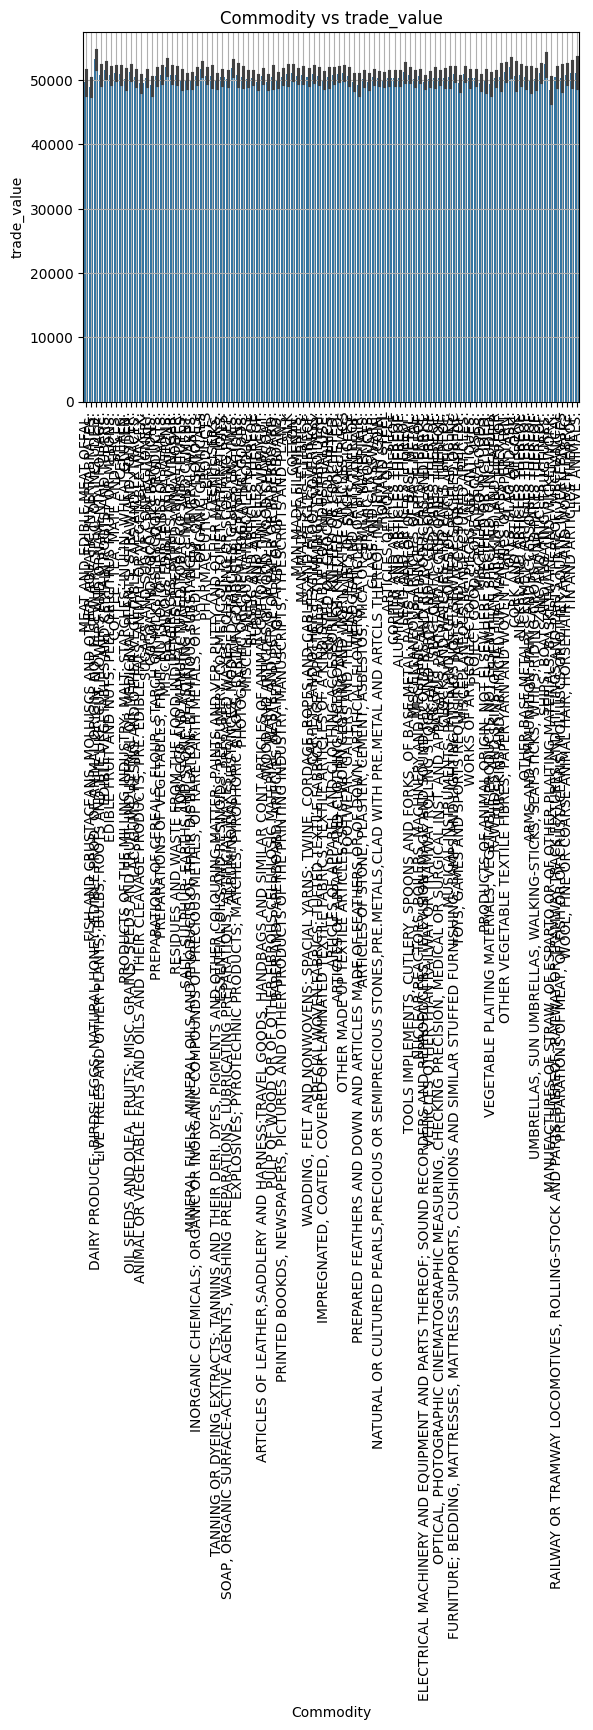

In [107]:
sns.barplot(df_trade_data, x="Commodity", y="trade_value")
plt.title("Commodity vs trade_value")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### country, trade_value

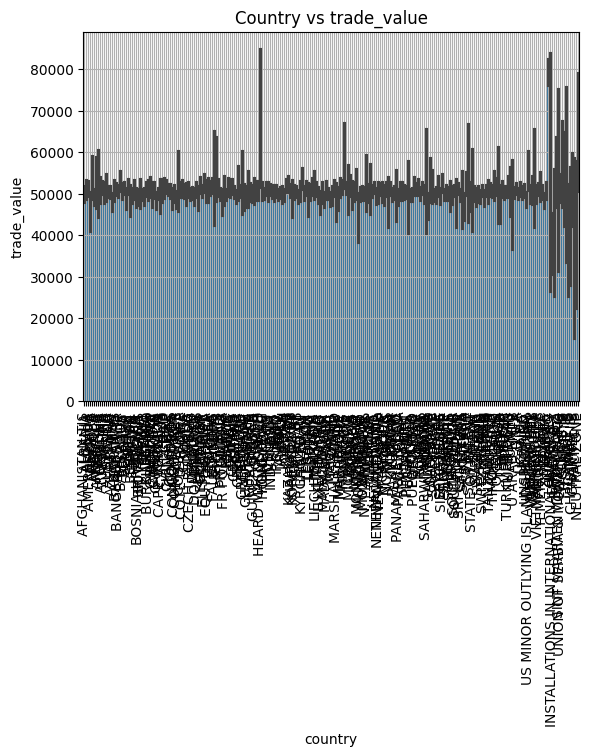

In [108]:
sns.barplot(df_trade_data, x="country", y="trade_value")
plt.title("Country vs trade_value")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### type, quantity

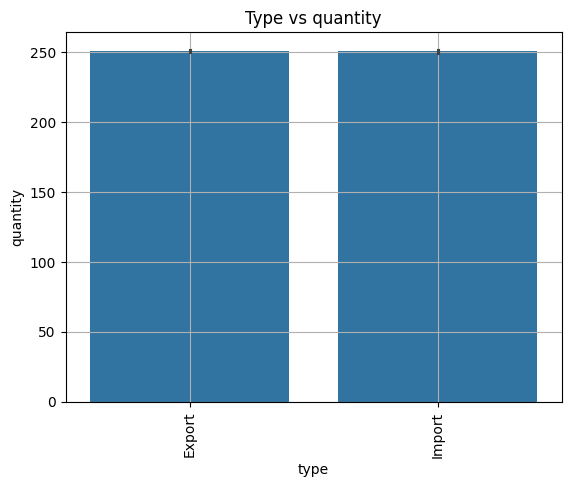

In [109]:
sns.barplot(df_trade_data, x="type", y="quantity")
plt.title("Type vs quantity")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Commodity, quantity

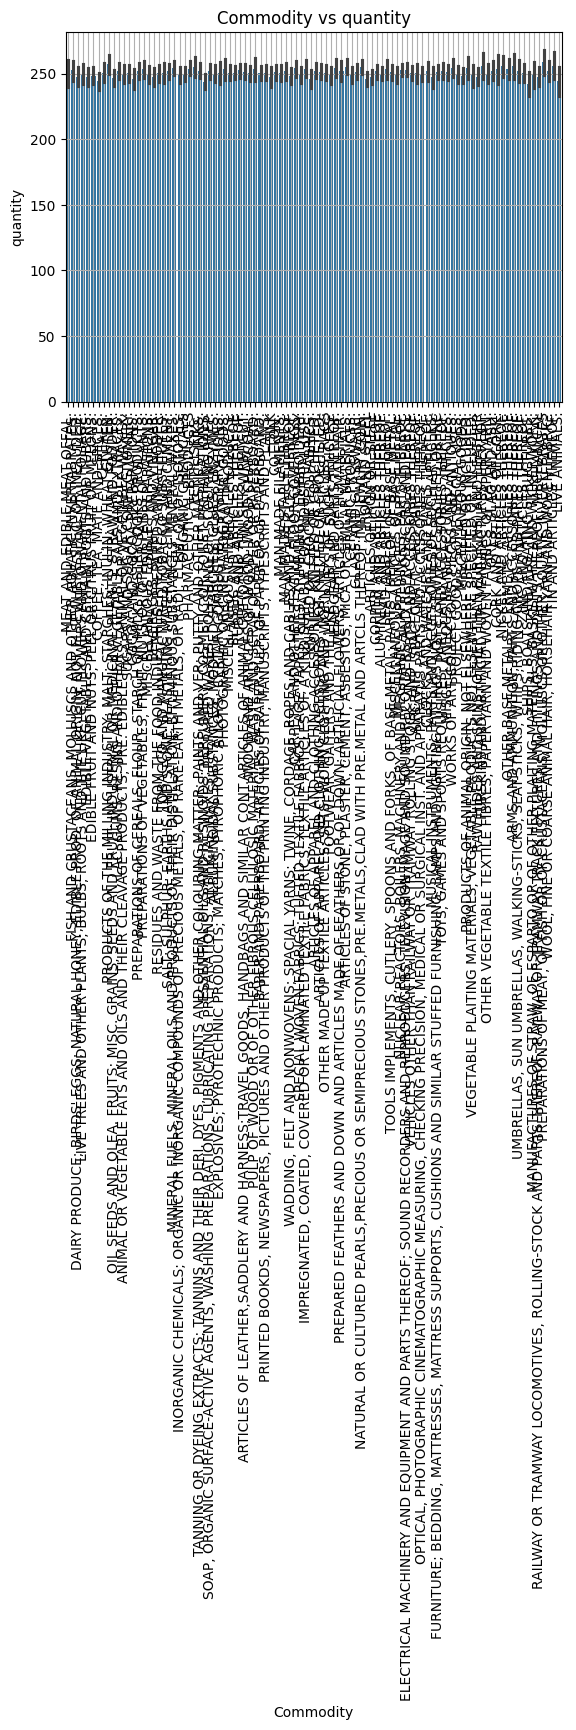

In [110]:
sns.barplot(df_trade_data, x="Commodity", y="quantity")
plt.title("Commodity vs quantity")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### country, quantity

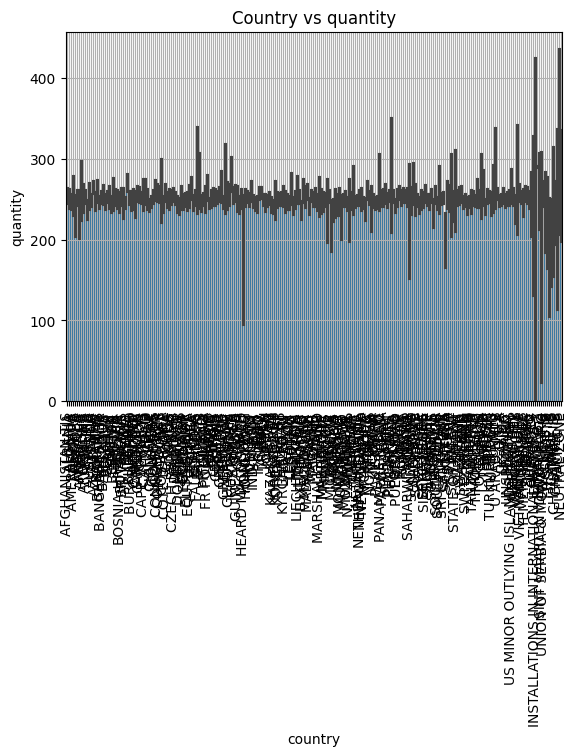

In [111]:
sns.barplot(df_trade_data, x="country", y="quantity")
plt.title("Country vs quantity")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### type, unit_price

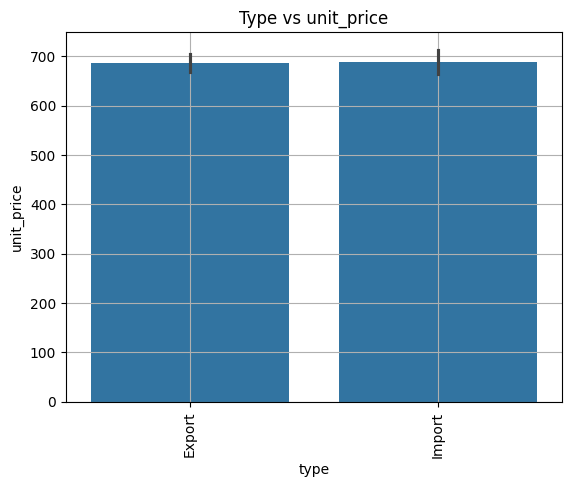

In [112]:
sns.barplot(df_trade_data, x="type", y="unit_price")
plt.title("Type vs unit_price")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Commodity, unit_price

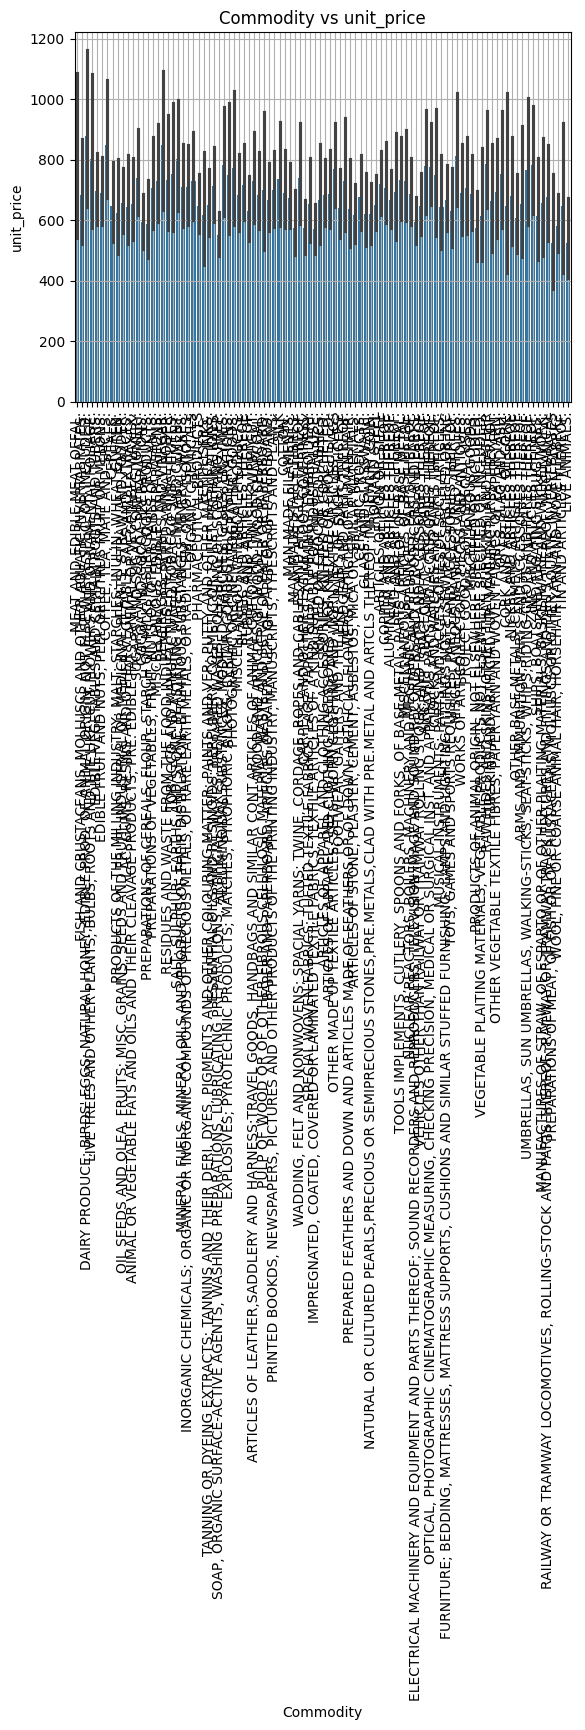

In [113]:
sns.barplot(df_trade_data, x="Commodity", y="unit_price")
plt.title("Commodity vs unit_price")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### country, unit_price

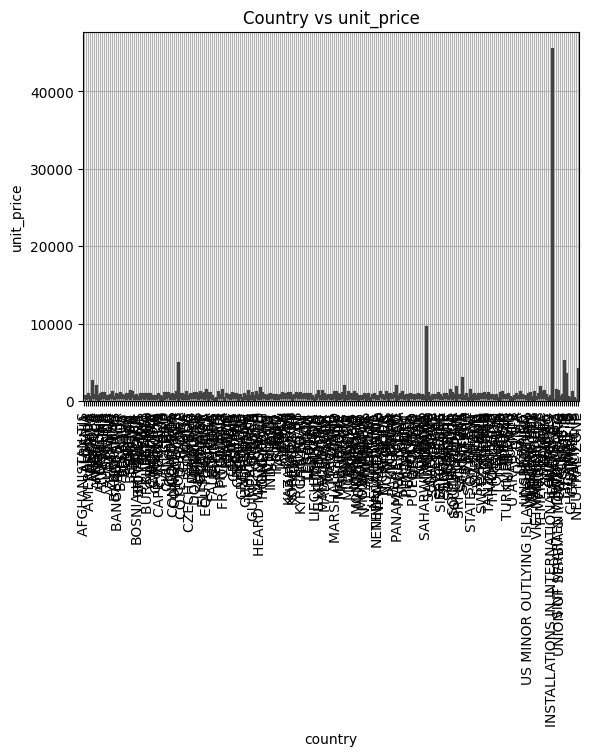

In [114]:
sns.barplot(df_trade_data, x="country", y="unit_price")
plt.title("Country vs unit_price")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### type, shipping_cost

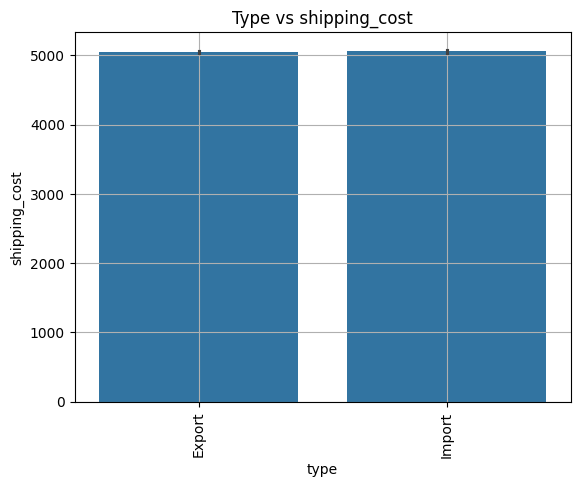

In [115]:
sns.barplot(df_trade_data, x="type", y="shipping_cost")
plt.title("Type vs shipping_cost")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Commodity, shipping_cost

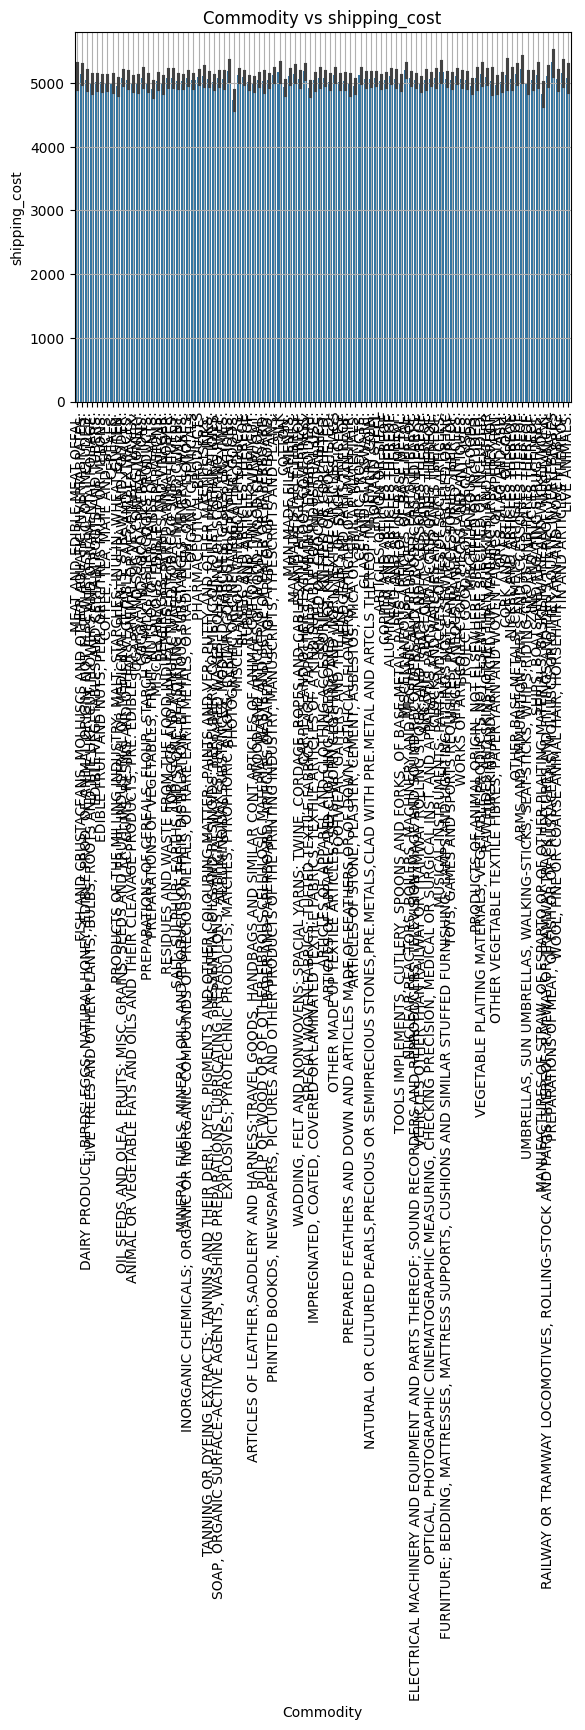

In [116]:
sns.barplot(df_trade_data, x="Commodity", y="shipping_cost")
plt.title("Commodity vs shipping_cost")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### country, shipping_cost

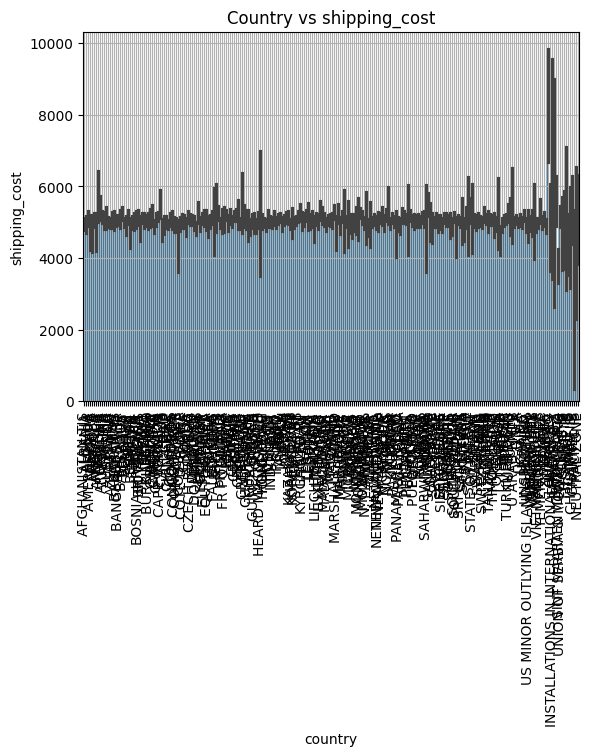

In [117]:
sns.barplot(df_trade_data, x="country", y="shipping_cost")
plt.title("Country vs shipping_cost")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### type, tax

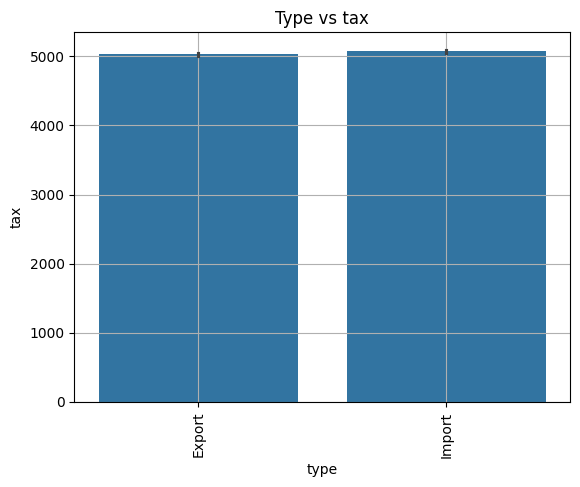

In [118]:
sns.barplot(df_trade_data, x="type", y="tax")
plt.title("Type vs tax")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Commodity, tax

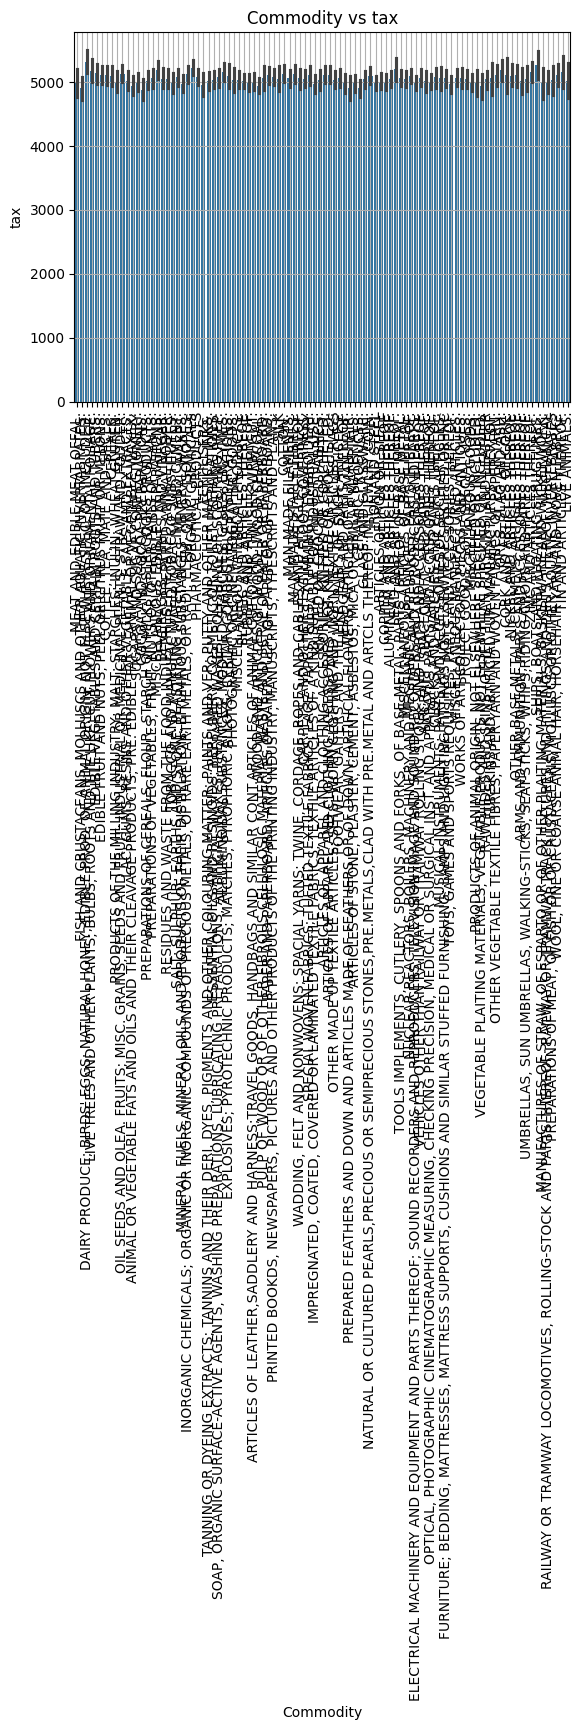

In [119]:
sns.barplot(df_trade_data, x="Commodity", y="tax")
plt.title("Commodity vs tax")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### country, tax

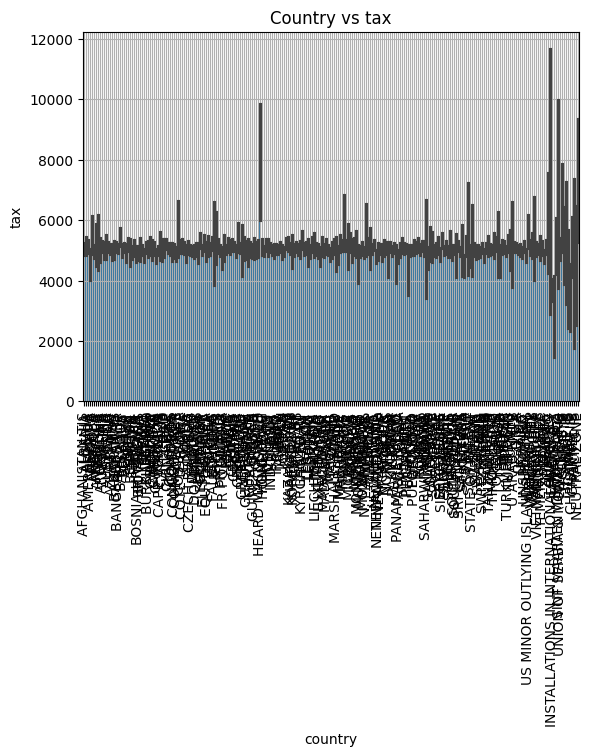

In [120]:
sns.barplot(df_trade_data, x="country", y="tax")
plt.title("Country vs tax")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### type, duty

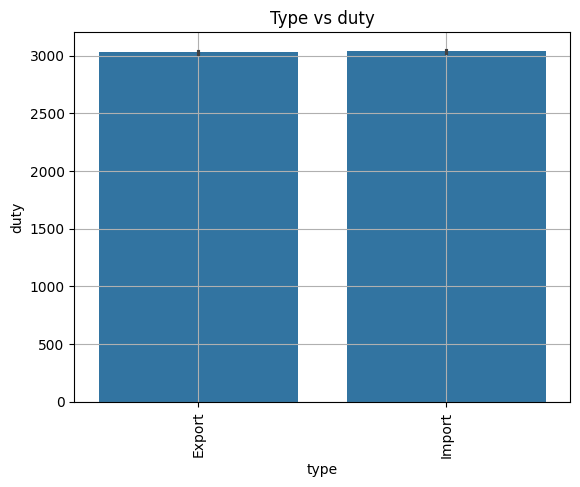

In [121]:
sns.barplot(df_trade_data, x="type", y="duty")
plt.title("Type vs duty")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### Commodity, duty

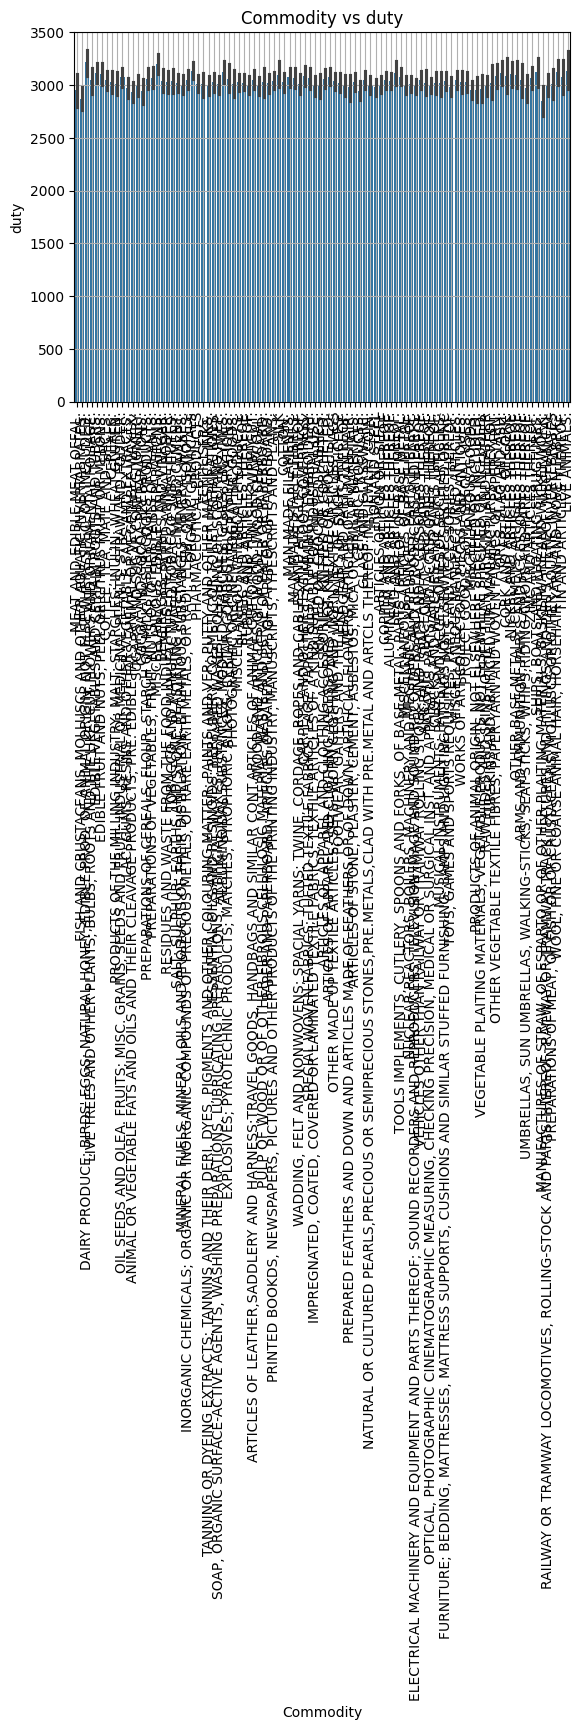

In [122]:
sns.barplot(df_trade_data, x="Commodity", y="duty")
plt.title("Commodity vs duty")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

### country, duty

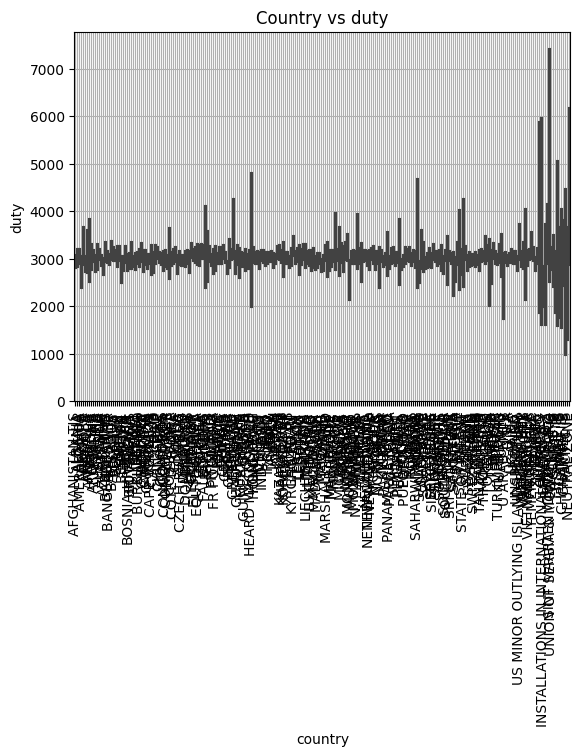

In [123]:
sns.barplot(df_trade_data, x="country", y="duty")
plt.title("Country vs duty")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()